<img src="esp_disk_2d_projection.gif" align="right" width="500px"/>

# The strength of a barred galaxy
### (source: J. Binney and S. Tremaine, "Galactic dynamics")


The surface density profile of many galactic disks is often described by an exponential form such as: 

$$I(R) = I_0 \mathrm{e}^{- R / R_{\mathrm{scale}}}$$

If we assume the surface density profile to also abide by the same rule, we can say:

$$\Sigma(R) = \Sigma_0 \mathrm{e}^{- R / R_{\mathrm{d}}}$$

where $R_{\mathrm{d}} = R_{\mathrm{scale}}$. 
Using Poisson's equation, one can demonstrate that the potential is of the form: 

$$\Phi(R, 0) = -\pi G \Sigma_0 R [I_0(y)K_1(y) - I_1(y)K_0(y)] \ \text{where} y = \frac{R}{2R_d}$$

$I_n$, and $K_n$ are the modified Bessel functions of the $n$ type resulting from the integral. If we differentiate the above equation, we can write the circular speed of the exponential disk (Freedman 1970): 

$$v_{\mathrm{c}}^2 (R) = R \frac{\partial \Phi}{\partial R} = 4\pi G \Sigma_0 R_{\mathrm{d}} y^2 (I_0(y)K_0(y) - I_1(y)K_1(y))$$

If we take into consideration the disk embedded in a halo described by means of a Hernquist distribution we have a total velocity given by: 

$$v_{\mathrm{tot}} = \sqrt{v_{\mathrm{c}}^2 + \frac{G M_{\mathrm{hernq}} R}{(R + a_{\mathrm{hernq}})^2}} \ \text{where} \ \frac{G M_{\mathrm{hernq}} R}{(R + a_{\mathrm{hernq}})^2} = v_{\mathrm{hernq}}^2$$

Integrating the surface density over the whole space results in the mass contained within a radius $R$ in the $z=0$ plane: 

$$M_{\mathrm{d}}(r) = 2\pi \Sigma_0 R_{\mathrm{d}}^2 (1 - \mathrm{e}^{-R/R_{\mathrm{d}}}(1 + \frac{R}{R_{\mathrm{d}}}))$$

The exponential disk achieves a maximum speed that is about 15% higher than that of an equivalent spherical distribution. 

In [1]:
import numpy as np
import scipy
import math
import random
import pandas as pd
from matplotlib import animation
import matplotlib as mpl

from matplotlib.animation import FuncAnimation
import os
import time
from skspatial.objects import Sphere
from scipy.stats import uniform
from scipy.integrate import quad
import tqdm as tqdm

from matplotlib import pyplot as plt
from matplotlib import colormaps
%matplotlib inline
%config InlineBackend.figure_format='retina'

Define the disk parameters:

In [2]:
R_d = 1 #Scale radius
M = 1 #Total mass of the system
N = 20000 #Number of particles
G = 1 #Newton gravitation constant
m = M / N #The mass of a single particle
sigma_0 = M / (2 * np.pi * R_d**2) #The surface density

Define the halo and bulge parameters:

In [3]:
#Halo
a_halo = 10 #Scaling length
M_halo = 6 #Total mass
N_halo = 1000 #N particles for representation

## Positions sampling:

We sample the disk first, and then, just for the sake of visualization also the bulge and halo, even if in the simulation they'll just be fixed potentials acting on the disk particles.

In [4]:
def cumulative_c(R, R_d): 
    
    '''Cumulative distribution to sample radial positions.'''
    
    return 1 - np.exp(-R / R_d) * (1 + R / R_d)

In [5]:
R_grid = np.linspace(0, 30 * R_d, 100)
c_i = cumulative_c(R_grid, R_d)
c_i = c_i / max(c_i)

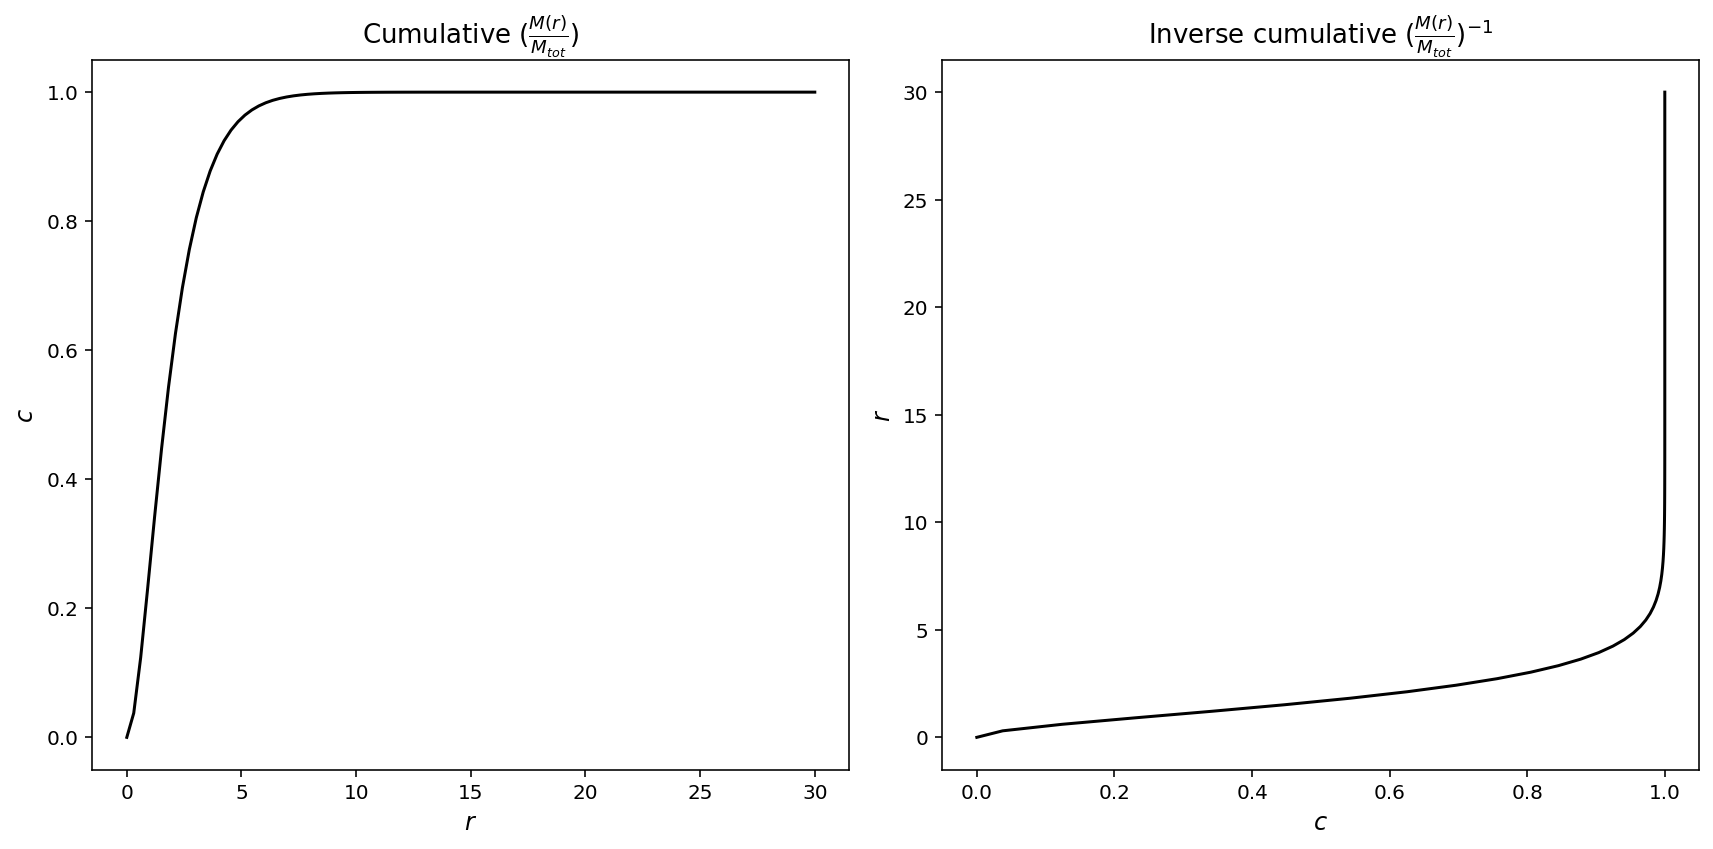

In [6]:
fig, ax = plt.subplots(1,2, tight_layout=True, figsize=(12, 6)) 

ax[0].plot(R_grid, c_i, c='black')
ax[0].set_title(r'Cumulative $(\frac{M(r)}{M_{tot}})$', fontsize=13)
ax[0].set_xlabel(r'$r$', fontsize=12)
ax[0].set_ylabel(r'$c$', fontsize=12)

ax[1].plot(c_i, R_grid, c='black')
ax[1].set_title(r'Inverse cumulative $(\frac{M(r)}{M_{tot}})^{-1}$', fontsize=13)
ax[1].set_xlabel(r'$c$', fontsize=12)
ax[1].set_ylabel(r'$r$', fontsize=12);

In [7]:
#Interpolate the inverse since not analytical

inverse_c_interp = scipy.interpolate.interp1d(c_i, R_grid)

We extract the distribution:

In [8]:
#Co-planar distribution on z=0

c = np.random.uniform(0, max(c_i), N)
R = inverse_c_interp(c)
theta = np.random.uniform(0, 2 * np.pi, N)

x = R * np.cos(theta)
y = R * np.sin(theta)
z = [0] * N

In [9]:
fig = plt.figure(figsize=(12, 6), tight_layout=True)

ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
image=ax.scatter(x, y, z, c = np.sqrt(x**2+y**2), alpha=0.9, s=2.5, cmap='inferno', clim=(0, 6 * R_d))
ax.set_xlabel('X [kpc]', fontsize=12)
ax.set_ylabel('Y [kpc]', fontsize=12)
ax.set_zlabel('Z [kpc]', fontsize=12)
ax.set_title(rf'Galactic disk distribution ($R_d={R_d}$ kpc, $M = {M} \cdot 10^{{11}} \ M_{{\odot}}$)', fontsize=13)
ax.set_xlim(-7 * R_d, 7 * R_d)
ax.set_ylim(-7 * R_d, 7 * R_d)
ax.set_zlim(-7 * R_d, 7 * R_d)
plt.colorbar(image, fraction=0.046, pad=0.09)
plt.tight_layout()

ax = fig.add_subplot(1, 2, 2)

theta_Rd = np.linspace(0, 2*np.pi, 100)
R_rd = R_d
x1 = R_rd*np.cos(theta_Rd)
x2 = R_rd*np.sin(theta_Rd)

#for i in range(x.shape[0]):

    
ax.scatter(x, y, c = np.sqrt(x**2+y**2), alpha=0.9, s=2.5, label='stars', clim=(0, 6 * R_d), cmap='inferno')

ax.scatter(x1, x2, color='red',alpha=1, s=0.5, label='$R_d$')
ax.set_xlabel('X [kpc]', fontsize=12)
ax.set_ylabel('Y [kpc]', fontsize=12)
ax.axis('equal')
ax.set_title('Initial distribution in the $x, y$ plane')
ax.set_xlim(-7 * R_d, 7 * R_d)
ax.set_ylim(-7 * R_d, 7 * R_d)
plt.tight_layout()
ax.legend(fontsize='large')
plt.savefig('expdisk-dist.pdf');

Let's visualize the complete system witht the bulge and halo:

In [10]:
# Sampling positions
r_halo = a_halo * (1 / (1 - np.sqrt(np.random.random(N))) - 1)
theta_halo = np.arccos(1 - 2 * np.random.random(N))
phi_halo = np.random.uniform(0, 2 * np.pi, N)

In [11]:
# Convert to (x,y,z) points
x_halo = r_halo * np.sin(theta_halo) * np.cos(phi_halo)
y_halo = r_halo * np.sin(theta_halo) * np.sin(phi_halo)
z_halo = r_halo * np.cos(theta_halo)

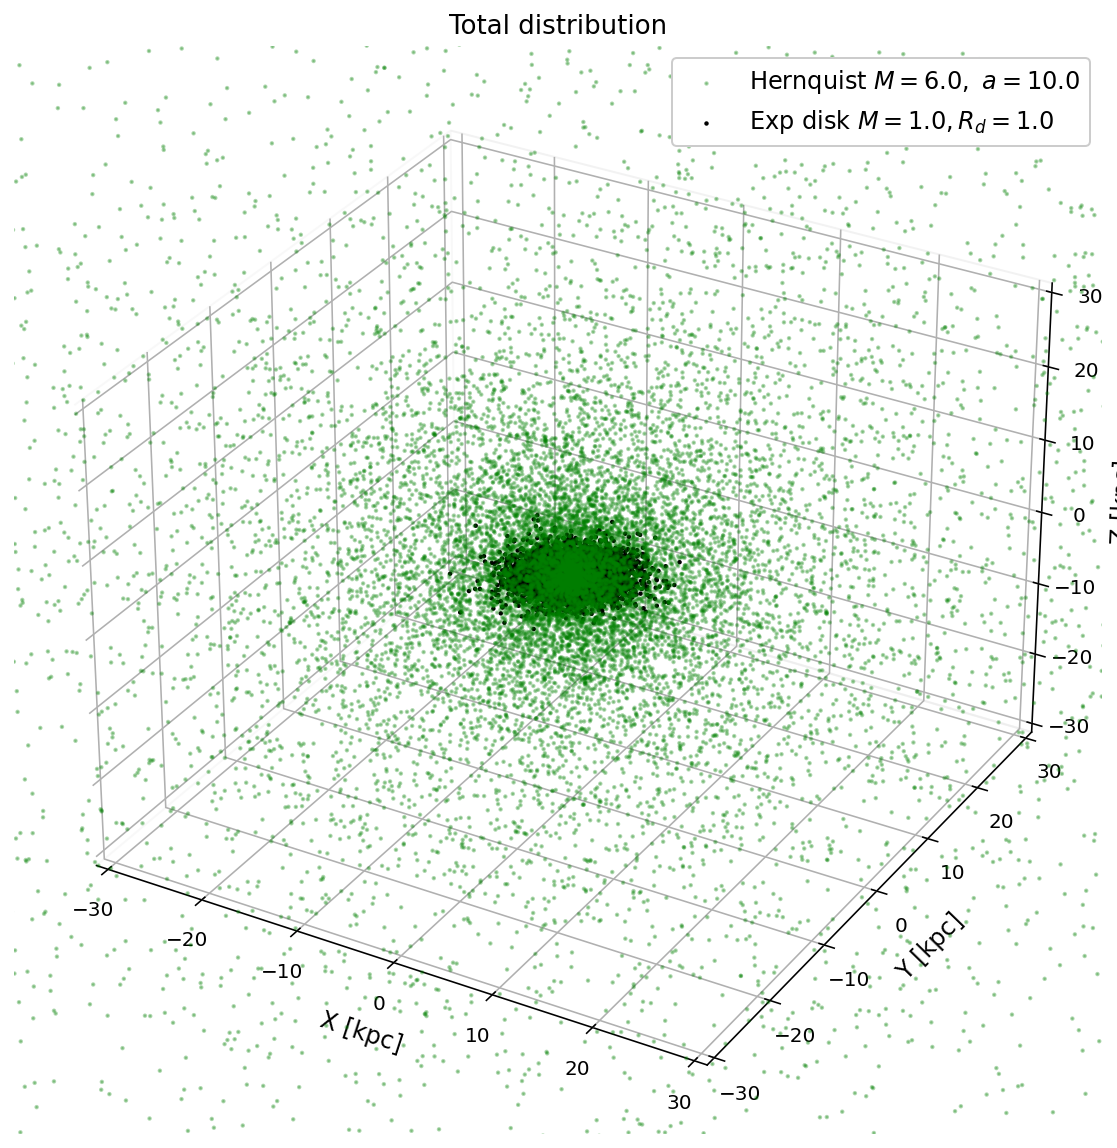

In [12]:
fig = plt.figure(figsize=(10, 10))
ax  = plt.axes(projection='3d')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.scatter(x_halo, y_halo, z_halo, c = 'green', alpha=0.3, s=1.5, label=f'Hernquist $M={M_halo:.1f}, \ a={a_halo:.1f}$')
ax.scatter(x, y, z, c = 'black', alpha=1, s=1.5, label=f'Exp disk $M={M:.1f},R_d={R_d:.1f}$')
ax.set_title('Total distribution', fontsize=13)
ax.axis('equal')
ax.set_xlim(-3 * a_halo, 3 *a_halo)
ax.set_ylim(-3 * a_halo, 3 *a_halo)
ax.set_zlim(-3 * a_halo, 3 *a_halo)

#ax.set_xlim(-4*a_bulge,4*a_bulge)
#ax.set_ylim(-4*a_bulge,4*a_bulge)
#ax.set_zlim(-4*a_bulge,4*a_bulge)
ax.set_xlabel('X [kpc]', fontsize=12)
ax.set_ylabel('Y [kpc]', fontsize=12)
ax.set_zlabel('Z [kpc]', fontsize=12)
plt.legend(fontsize='large', loc='upper right', framealpha=1);

## Orbital motion in the epicycle approximation

The stars in a galactic disk travel on nearly circular orbits. Consequently the DFs that generate cool disks in which the random velocities are much smaller than the circular speed are central to understand disk galaxies. The radius of a star is nearly on the circular radius $R_{\mathrm{g}}$. The radial density profile is indeed depending by $L_{\mathrm{z}}$.

Defining $H_{\mathrm{R}} = \frac{1}{2} (v_{\mathrm{R}}^2 + \gamma^2 \bar{v}_{\mathrm{\phi}}^2)$, and $\gamma = \frac{2 \Omega_{\mathrm{g}}}{k}$ ($k$ the epicyclic frequency), we can express a distribution function of the form:

$$f_{\mathrm{Sch}} = S(L_{\mathrm{z}}) \cdot \mathrm{exp}( -\frac{v_{\mathrm{R}}^2 + \gamma^2 \bar{v}_{\mathrm{\phi}}^2}{2 \sigma_{\mathrm{R}}^2(L_{\mathrm{z}})} - \frac{v_{\mathrm{z}}^2 + 2 \Phi_{\mathrm{z}}(z, L_{\mathrm{z}})}{2 \sigma_{\mathrm{z}}^2(L_{\mathrm{z}})} )$$

In the epicycle approximation $\sigma_{\mathrm{R}}$ varies very slowly with $L_{\mathrm{z}} = R(v_{\mathrm{c}} + \bar{v}_{\mathrm{\phi}})$, that they change negligibly so long as $|\bar{v}_{\mathrm{\phi}}| < n \cdot \sigma_{\mathrm{R}}$, where $n \in \mathcal{N}$. $S(L_{\mathrm{z}})$ will be a function that depends on $\Sigma_{\mathrm{R}}$ by definition (it comes out of the integration of a gaussian so it's pretty straightforward). 

To summarize I will adopt the following structure for the velocities:

$$v_{\mathrm{R}} =  \sigma_{\mathrm{R}} \ \ \ \text{with} \ \sigma_{\mathrm{R}} \text{multiplied by} \ n \ \in \ [0, 1] $$

$$v_{\mathrm{\Phi}} = v_{\mathrm{\Phi, mean}} + \sigma_{\mathrm{\Phi}} \ \ \ \text{with} \ \sigma_{\mathrm{\Phi}} \text{multiplied by} \ n \ \in \ [0, 1]$$

$$v_{\mathrm{z}} = \sigma_{\mathrm{z}} = \sigma_{\mathrm{R}}$$

And I will determine the two velocities dispersions according to the relations:

$$Q_{\mathrm{T}} = \frac{\sigma_{\mathrm{R}} k}{3.36 G \Sigma(R)} > 1$$

$$\downarrow$$

$$\sigma_{\mathrm{R}} =  \frac{3.36 G Q_{\mathrm{T}} \Sigma(R)}{k}$$

$$\sigma_{\mathrm{\Phi}} = \sqrt{\frac{\sigma_{\mathrm{R}}^2}{\gamma^2}} = \sqrt{\frac{\sigma_{ \mathrm{R}}^2 k^2}{4 \Omega_{\mathrm{g}}^2}}$$

$$\sigma_{\mathrm{z}} \sim \sigma_{\mathrm{R}}$$

## Placing the disk in a halo and bulge

The disk itself will not be stable. It has been tested (damn!) many times using this notebook. Subsequently, I used the modified version of the $\texttt{treecode}$ algorithm (https://home.ifa.hawaii.edu/users/barnes/treecode/treeguide.html) that Alessandro (https://github.com/Alexpedro130), Olga (https://github.com/olghyn) and I produced. We in particular set the disk in a halo environment, which was in the form of a $\textbf{fixed Hernquist sphere}$ whose potential acts on our particles. Basically, we are just considering the presece of such halo as an external potential, without generating further particles which will complicate the picture and make the simulation quite impossible to realize. 

For each particle iteration we summed the contribution to the acceleration of the particle from the potential of the Hernquist sphere of a given fixed mass $M = 5$, and $a = 2$ as: 

$$ a_{\mathrm{Hernq}} = -\frac{(M * 2 * (dr_{\mathrm{O}} + a) - (3 * dr_{\mathrm{O}}))}{(dr_{\mathrm{O}} + a)^{4}} \ \text{where} \  dr_{\mathrm{O}} = |\bar{r}| \text{.}$$ 

The resulting simulation should return a stable disk. For further information look for the "$\texttt{local void sumhernquist}$" function in the $\textit{treegrav.c}$ file present in this folder. 

## The functions used and some useful plots to see

In the following section I am defining some helpful functions and plotting some useful quantities I will need in my analysis. Starting from the potential $\Phi(R, 0)$, I will then plot the function $f = \Omega(R) - \frac{1}{2}k(R)$. This is extremely useful because the formation of the bar depends on the shape of the function itself. To have particles that move with the same resonance frequency, we need a "plateau" in $f$, which to some extent also gives you info on the bar's width.

### Functions

In [13]:
def square_hernquist_sum_v(R, a_halo, M_halo):
    
    sqrd_v_1 = G * M_halo * R / (R + a_halo)**2
    
    return sqrd_v_1

In [14]:
def square_hernquist_sum_k(R, a_halo, M_halo):
    
    deriv_1 = - G * M_halo * (a_halo + 3 * R) / ((R + a_halo)**3 * R**2)
    
    sqrd_omega_1 = G * M_halo / (R * (a_halo + R)**2)
    
    return (4 * sqrd_omega_1 + R * deriv_1)

In [15]:
def v_circ_disk(R, R_d, sigma_0):
    
    '''This function evaluates the disk circular velocity, using the modified Bessel's functions K and I.'''
    
    y = R / (2 * R_d)
    
    I_0_y = scipy.special.iv(0, y)
    K_0_y = scipy.special.kv(0, y)
    I_1_y = scipy.special.iv(1, y)
    K_1_y = scipy.special.kv(1, y)
    
    return np.sqrt(4 * np.pi * G * sigma_0 * R_d * y**2 * (I_0_y * K_0_y - I_1_y * K_1_y))

In [16]:
def omega_disk(R, R_d, sigma_0):
    
    '''This function evaluates the disk circular angular velocity, using the modified Bessel's functions K and I.'''
    
    return v_circ_disk(R, R_d, sigma_0) / R

In [17]:
def kappa_disk(R, R_d, sigma_0):
    
    '''This function evaluates the epicyclic frequency, using the modified Bessel's functions K and I.'''
    
    y = R / (2 * R_d)
    
    I_0_y = scipy.special.iv(0, y)
    K_0_y = scipy.special.kv(0, y)
    I_1_y = scipy.special.iv(1, y)
    K_1_y = scipy.special.kv(1, y)
    
    dI_0_y = scipy.special.ivp(0, y)
    dK_0_y = scipy.special.kvp(0, y)
    dI_1_y = scipy.special.ivp(1, y)
    dK_1_y = scipy.special.kvp(1, y)
    
    sqrd_omega_disk = omega_disk(R, R_d, sigma_0)**2
    deriv_disk = (dI_0_y * K_0_y + dK_0_y * I_0_y - I_1_y * dK_1_y - dI_1_y * K_1_y) * 0.5 * 1/R_d
    const_disk = np.pi * G * sigma_0 / R_d
    
    return np.sqrt(4 * sqrd_omega_disk + R * const_disk * deriv_disk)

In [18]:
#Use the definitons above and sum the squared powers: 

sqrd_omega_hernq = square_hernquist_sum_v(R, a_halo, M_halo) / R**2
total_omega = np.sqrt(omega_disk(R, R_d, sigma_0)**2 + sqrd_omega_hernq)

sqrd_kappa_hernq = square_hernquist_sum_k(R, a_halo, M_halo)
total_kappa = np.sqrt(kappa_disk(R, R_d, sigma_0)**2 + sqrd_kappa_hernq) 

In [19]:
def calculate_phi_tot(R, R_d, sigma_0, a_halo, M_halo): 
    
    '''This function evaluates the potential of an exponential disk, using the 
    modified Bessel's functions K and I.'''
    
    y = R / (2 * R_d)
    
    I_0_y = scipy.special.iv(0, y)
    K_0_y = scipy.special.kv(0, y)
    I_1_y = scipy.special.iv(1, y)
    K_1_y = scipy.special.kv(1, y)
    
    rho_0_halo = M_halo / (2 * np.pi * a_halo**3)
    
    # - 4\pi G \rho_0 a^{2} \frac{1}{2(1+\frac{r}{a})}
    
    return - np.pi * G * sigma_0 * R * (I_0_y * K_1_y - I_1_y * K_0_y) - \
                4 * np.pi * G * rho_0_halo * a_halo**2 * (1 / (2 * (1+R/a_halo)))

### Plots 

Let's start with the total potential: it will be the result of the superposition of the one of the disk, and the two Hernquist from the bulge and halo.

In [20]:
x_grid = np.linspace(-6 * R_d, 6 * R_d, 100)
y_grid = np.linspace(-6 * R_d, 6 * R_d, 100)

X, Y = np.meshgrid(x_grid, y_grid)
Z = calculate_phi_tot(np.sqrt(X**2+Y**2), R_d, sigma_0, a_halo, M_halo)

In [21]:
fig = plt.figure(figsize=(10, 6), tight_layout=True)
ax = fig.add_subplot(1, 1, 1, projection='3d')
image=ax.plot_surface(X, Y, Z, cmap='inferno', edgecolor='black', lw=0.25)
ax.set_xlabel('X [kpc]', fontsize=12)
ax.set_ylabel('Y [kpc]', fontsize=12)
ax.set_zlabel('\n\n $\Phi(R)$ [$M_{\odot}$ / kpc]', fontsize=12)
ax.set_title(r'Total potential $\Phi(R)$', fontsize=13)
ax.set_xlim(-6 * R_d, 6 * R_d)
ax.set_ylim(-6 * R_d, 6 * R_d)
ax.set_zlim(np.min(Z), np.max(Z))
#ax.view_init(35, -75)
plt.tight_layout()
plt.colorbar(image, fraction=0.046, pad=0.09)
plt.savefig('Total-pot.pdf', bbox_inches='tight');

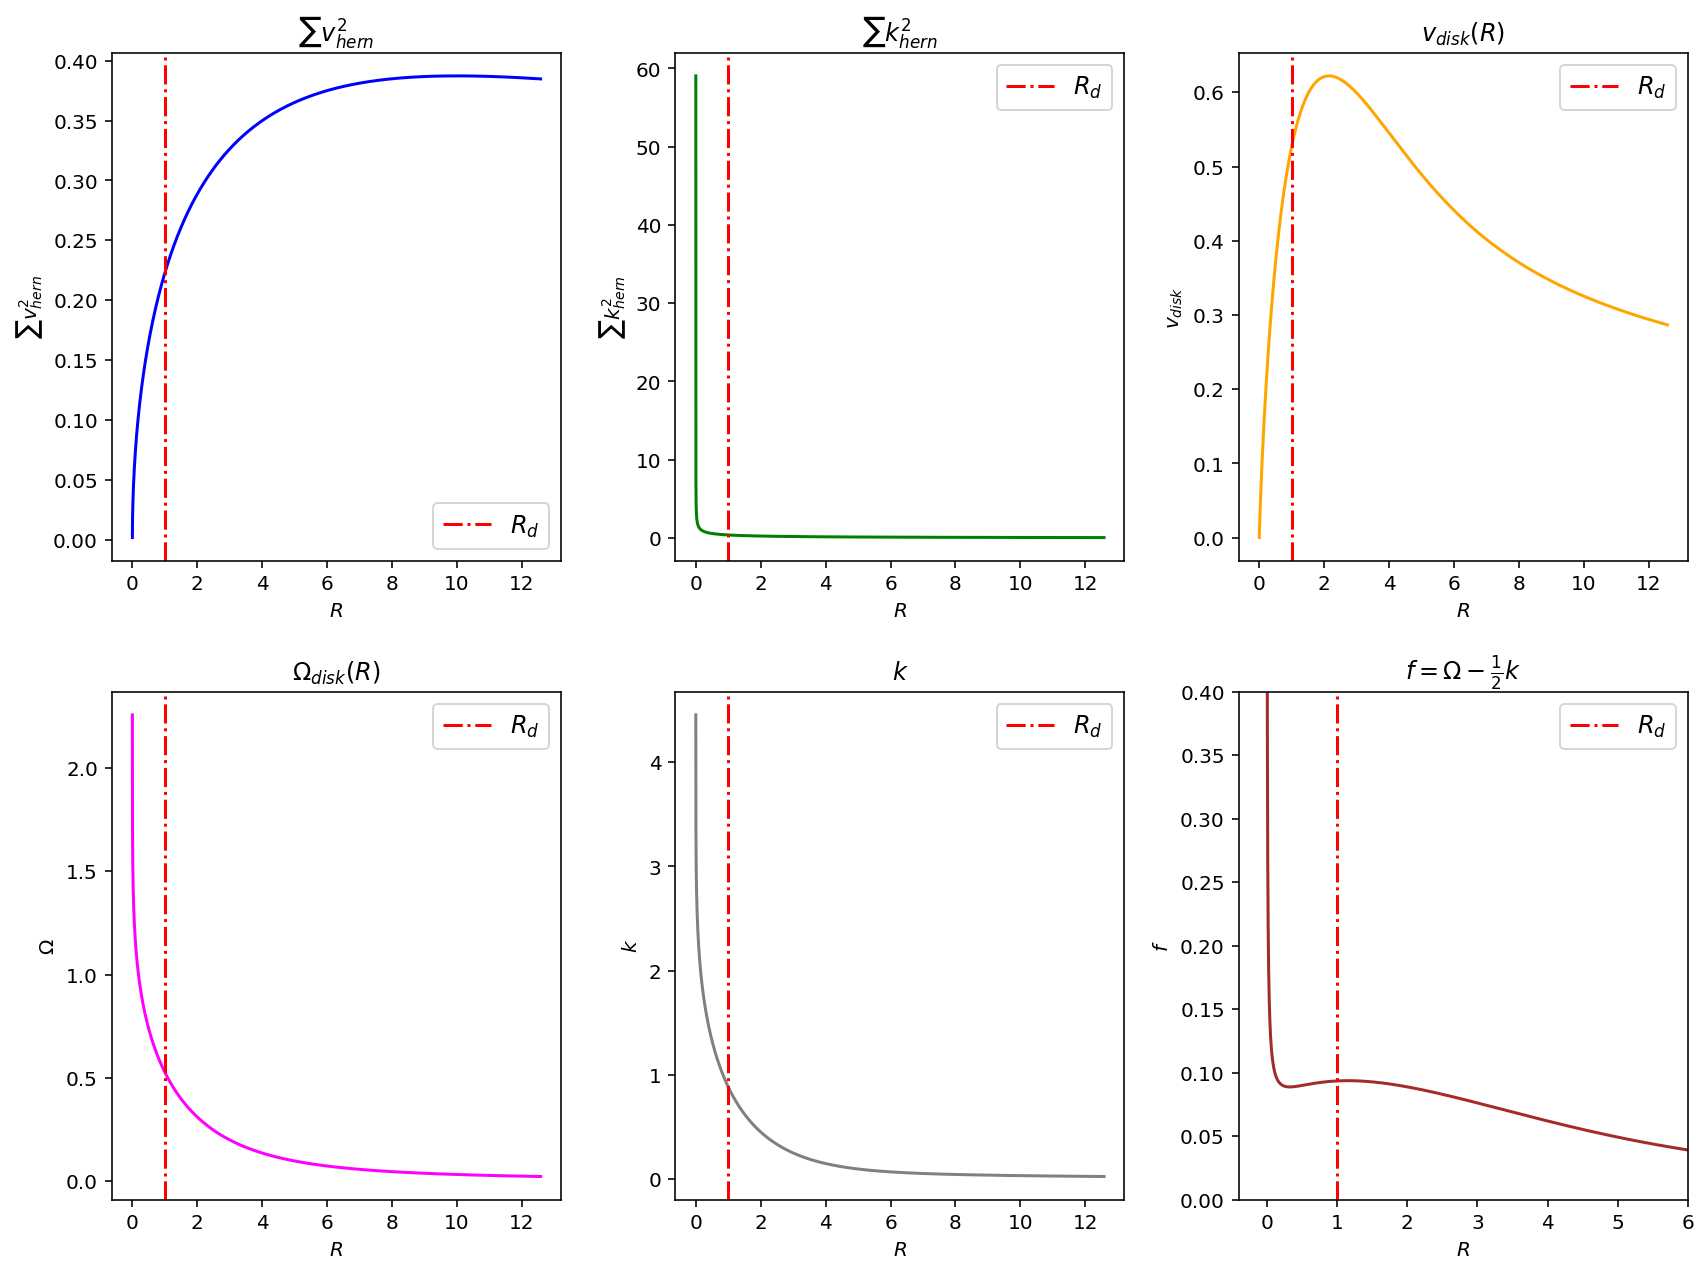

In [22]:
fig, axs = plt.subplots(2, 3, figsize=(12, 9))

axs[0, 0].plot(R[np.argsort(R)], np.sqrt(square_hernquist_sum_v(R, a_halo, M_halo)[np.argsort(R)]), color='blue') 
axs[0, 0].axvline(x=R_d, label='$R_d$', c='red', linestyle='-.')
axs[0, 0].set_xlabel('$R$')
axs[0, 0].set_ylabel('$\sum v_{hern}^2$')
axs[0, 0].set_title('$\sum v_{hern}^2$')
axs[0, 0].legend(fontsize='large');

axs[0, 1].plot(R[np.argsort(R)], np.sqrt(square_hernquist_sum_k(R, a_halo, M_halo)[np.argsort(R)]), color='green') 
axs[0, 1].axvline(x=R_d, label='$R_d$', c='red', linestyle='-.')
axs[0, 1].set_xlabel('$R$')
axs[0, 1].set_ylabel('$\sum k_{hern}^2$')
axs[0, 1].legend(fontsize='large')
axs[0, 1].set_title('$\sum k_{hern}^2$');

axs[0, 2].plot(R[np.argsort(R)], v_circ_disk(R, R_d, sigma_0)[np.argsort(R)], color='orange') 
axs[0, 2].axvline(x=R_d, label='$R_d$', c='red', linestyle='-.')
axs[0, 2].set_xlabel('$R$')
axs[0, 2].set_ylabel('$v_{disk}$')
axs[0, 2].legend(fontsize='large')
axs[0, 2].set_title('$v_{disk}(R)$');

axs[1, 0].plot(R[np.argsort(R)], omega_disk(R, R_d, sigma_0)[np.argsort(R)], color='magenta') 
axs[1, 0].axvline(x=R_d, label='$R_d$', c='red', linestyle='-.')
axs[1, 0].set_xlabel('$R$')
axs[1, 0].set_ylabel('$\Omega$')
axs[1, 0].legend(fontsize='large')
axs[1, 0].set_title('$\Omega_{disk}(R)$');

axs[1, 1].plot(R[np.argsort(R)], kappa_disk(R, R_d, sigma_0)[np.argsort(R)], color='grey') 
axs[1, 1].axvline(x=R_d, label='$R_d$', c='red', linestyle='-.')
axs[1, 1].set_xlabel('$R$')
axs[1, 1].set_ylabel('$k$')
axs[1, 1].legend(fontsize='large')
axs[1, 1].set_title('$k$');


axs[1, 2].plot(R[np.argsort(R)], (total_omega - 0.5 * total_kappa)[np.argsort(R)], color='brown') 
axs[1, 2].axvline(x=R_d, label='$R_d$', c='red', linestyle='-.')
axs[1, 2].set_xlabel('$R$')
axs[1, 2].set_ylabel('$f$')
axs[1, 2].set_ylim(0, 0.4)
axs[1, 2].set_xlim(-0.4, 6)
axs[1, 2].legend(fontsize='large')
axs[1, 2].set_title(r'$f = \Omega - \frac{1}{2}k$')


plt.tight_layout();

## Velocity initialization

We do not know whether this is correct, but we understand that the $\sigma_R$ parameter defined above depends on a surface density which necessarily will be influenced not only by the disk, but also by the hernquist distributions we set. This was the suggestion that came up from the internet:

In [23]:
def hernquist_density(r, M, a):
    return M / (2 * np.pi) * a / (r * (r + a)**3)

def integrand(z, R, M_halo, a_halo):
    r = np.sqrt(R**2 + z**2)
    return 2 * hernquist_density(r, M_halo, a_halo)

vectorized_integrand = np.vectorize(integrand)

def integrand1(z, R, M_bulge, a_bulge):
    r = np.sqrt(R**2 + z**2)
    return 2 * hernquist_density(r, M_bulge, a_bulge)

vectorized_integrand1 = np.vectorize(integrand1)

def halo_surface_density(R, M_halo, a_halo, M_bulge, a_bulge):
    
    result = np.zeros_like(R)
    result1 = np.zeros_like(R)
    for i, r_val in enumerate(R):
        result[i], _ = quad(vectorized_integrand, 0, np.inf, args=(r_val, M_halo, a_halo))
        result1[i], _ = quad(vectorized_integrand1, 0, np.inf, args=(r_val, M_bulge, a_bulge))
    
    return result + result1

In [24]:
def sigma_r(R, R_d, sigma_0, total_kappa, a_halo, M_halo):
    
    '''This function evaluates the dispersion along r, using the modified Bessel's functions K and I.'''

    Q = 1.2 #Toomre parameter for stability
    sigma_total = sigma_0 * (np.exp(-R / R_d))# + halo_surface_density(R, M_halo, a_halo, M_bulge, a_bulge)
    
    return 3.36 * G * Q * sigma_total / total_kappa

In [25]:
def sigma_phi(R, R_d, sigma_0, total_kappa, a_halo, M_halo, total_omega):
    
    '''This function evaluates the dispersion along r, using the modified Bessel's functions K and I.'''
    
    return sigma_r(R, R_d, sigma_0, total_kappa, a_halo, M_halo) * total_kappa / (2 * total_omega)

In [26]:
vR = sigma_r(R, R_d, sigma_0, total_kappa, a_halo, M_halo) * np.random.normal(size=N)

vphi_mean = np.sqrt(v_circ_disk(R, R_d, sigma_0)**2 + square_hernquist_sum_v(R, a_halo, M_halo)) 
vphi = vphi_mean + sigma_phi(R, R_d, sigma_0, total_kappa, a_halo, M_halo, total_omega) * np.random.normal(size=N)

phi = theta
vx = - vphi * np.sin(phi) + vR * np.cos(phi)
vy = vphi * np.cos(phi) + vR * np.sin(phi)
vz = sigma_r(R, R_d, sigma_0, total_kappa, a_halo, M_halo) * np.random.normal(size=N) 

v = np.sqrt(vx**2 + vy**2 + vz**2)

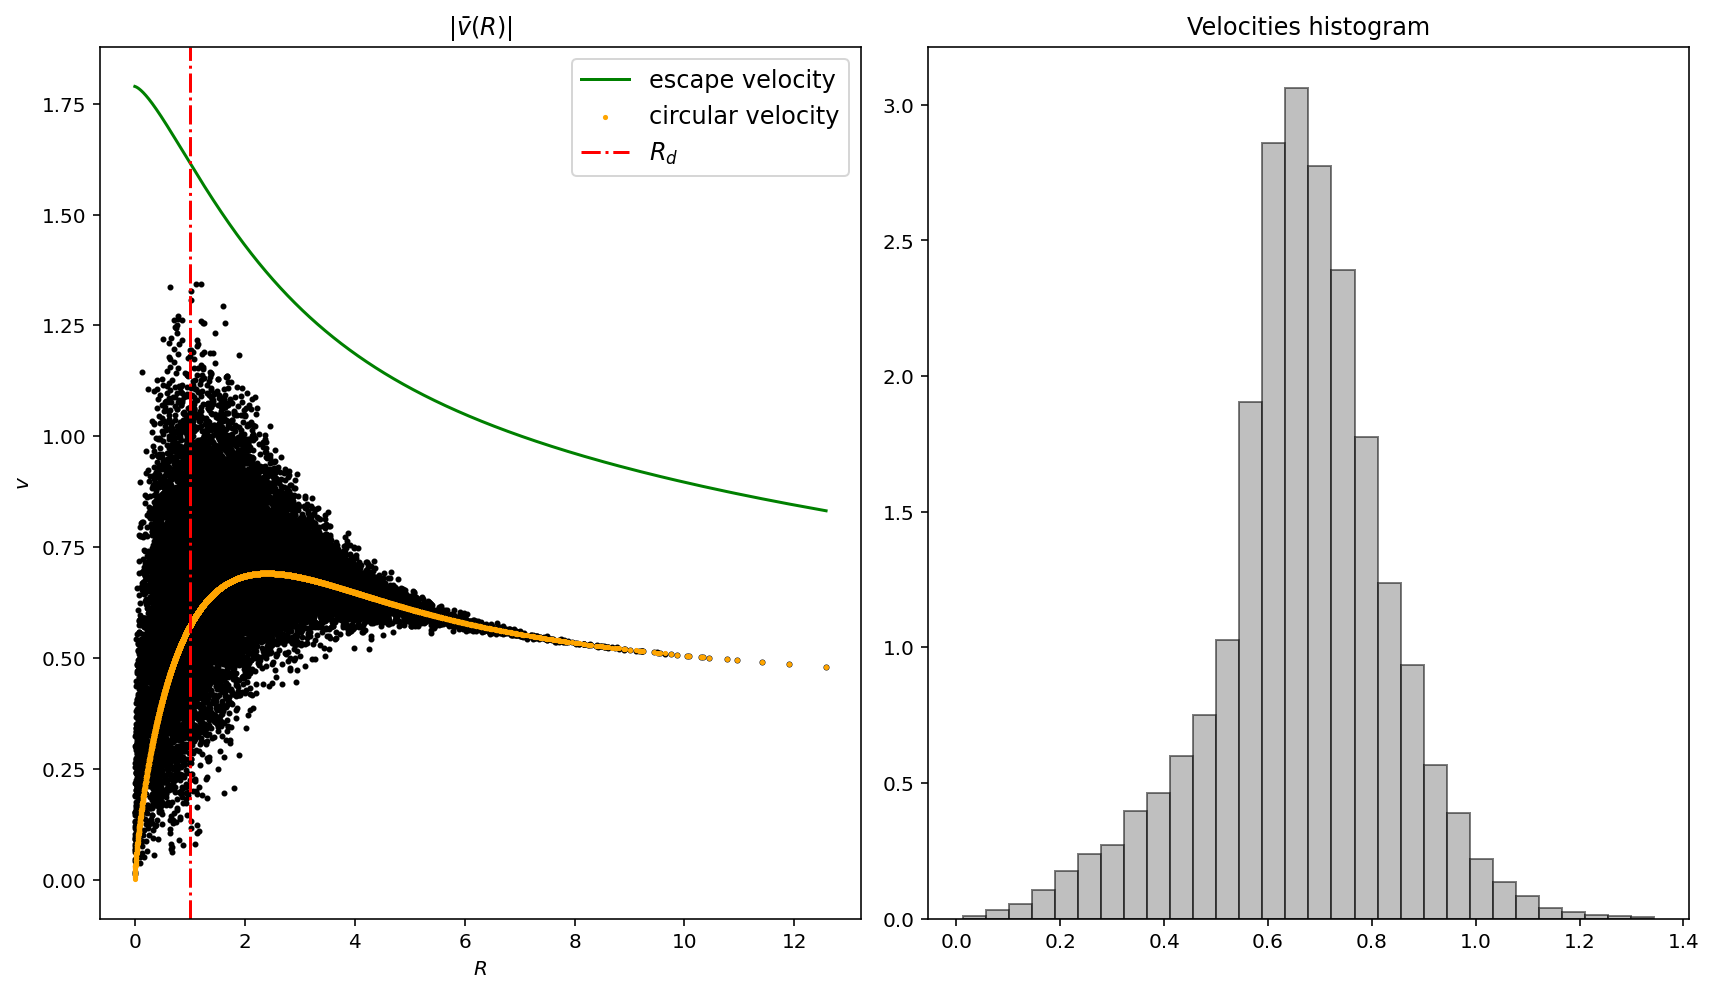

In [27]:
fig, ax = plt.subplots(1,2, tight_layout=True, figsize=(12, 7)) 

ax[0].scatter(R[np.argsort(R)], v[np.argsort(R)], color='black', s=4) 
ax[0].plot(R[np.argsort(R)], np.sqrt(- 2 * calculate_phi_tot(R, R_d, sigma_0, a_halo, M_halo)[np.argsort(R)]), color='green', label='escape velocity') 
ax[0].scatter(R[np.argsort(R)], (total_omega * R)[np.argsort(R)], color='orange', s=2.5, label='circular velocity')
ax[0].axvline(x=R_d, label='$R_d$', c='red', linestyle='-.')
ax[0].set_xlabel('$R$')
ax[0].set_ylabel('$v$')
ax[0].legend(fontsize='large')
ax[0].set_title(r'$|\bar{v}(R)|$');

ax[1].hist(v, bins=30, histtype='barstacked', color='grey', fill='true', alpha=0.5, edgecolor='black', density=True)
ax[1].set_title('Velocities histogram');

In the v-phase space:

In [28]:
fig = plt.figure(figsize=(6, 6))
ax  = plt.axes(projection='3d')

image=ax.scatter(vx, vy, vz, c = np.sqrt(vx**2+vy**2+vz**2), alpha=1, s=1.5, cmap='inferno', clim=(0*max(v), 1*max(v)))
ax.set_xlabel('vx', fontsize=12)
ax.set_ylabel('vy', fontsize=12)
ax.set_zlabel('vz', fontsize=12)
ax.set_title('3D initial velocities distribution', fontsize=13)
ax.axis('equal')
plt.tight_layout()
plt.colorbar(image, fraction=0.046, pad=0.09);

---

## Running the simulation

Once we set out our parameters we can simulate the disk using the correct compiled $\texttt{treecode}$ module (the one with the Hernquist sphere implemented in it). PSST: run this cell only if you $\textbf{really}$ need to change something in the analysis, as it takes some time to compile!

In [29]:
# open the file
file = open('exp_disk_distribution_4.txt', 'w')

# write the file
file.write(f'{N}\n')
file.write('3\n') # dimensions
file.write('0\n')

for i in range(N):
    file.write(f'{m}\n')

for i in range(N):
    file.write(f'{x[i]} {y[i]} {z[i]}\n')
    
for i in range(N):
    file.write(f'{vx[i]} {vy[i]} {vz[i]}\n')

# close the file
file.close()

In [30]:
T = 2 * np.pi / total_omega[10]
print('Orbital period for R=R_d:', T)

T_sim = 40 * T
print('Simulation time:', T_sim)

dt = T_sim / 1000
print('Time step:', dt)

theta = 0.2
print('Theta:', theta)

t_out = dt
print('Terminal out:', t_out)

Orbital period for R=R_d: 16.016107920691983
Simulation time: 640.6443168276793
Time step: 0.6406443168276793
Theta: 0.2
Terminal out: 0.6406443168276793


In [31]:
open('outdata_expdisk_4.txt', 'w').close()
os.system('time ./treecode in=exp_disk_distribution_4.txt  dtime='+ str(dt) +' theta='+str(theta)+ ' tstop='+str(T_sim) + ' dtout='+str(t_out)+' out=outdata_expdisk_4.txt >logout.txt')


real	30m29.967s
user	27m18.654s
sys	0m17.346s


0

---

## Data visualization and analysis

In [32]:
# reading the data from output-selected file

lines = pd.read_csv('outdata_expdisk_4.txt', names = list(range(3)), sep = '\s+')
N_particles = N
s = N*3+3

t_s  = np.array([lines.iloc[2::s,0].copy().dropna()]).flatten()
m_s  = np.array([lines.iloc[i::s,0].copy().dropna() for i in range(3, N+3)])
x_s  = np.array([lines.iloc[i::s,0].copy().dropna() for i in range(N+3, 2*N+3)])
y_s  = np.array([lines.iloc[i::s,1].copy().dropna() for i in range(N+3, 2*N+3)])
z_s  = np.array([lines.iloc[i::s,2].copy().dropna() for i in range(N+3, 2*N+3)])
vx_s = np.array([lines.iloc[i::s,0].copy().dropna() for i in range(2*N+3, 3*N+3)])
vy_s = np.array([lines.iloc[i::s,1].copy().dropna() for i in range(2*N+3, 3*N+3)])
vz_s = np.array([lines.iloc[i::s,2].copy().dropna() for i in range(2*N+3, 3*N+3)])

Visualize initial and final frame (very good to see already whether you made it or not):

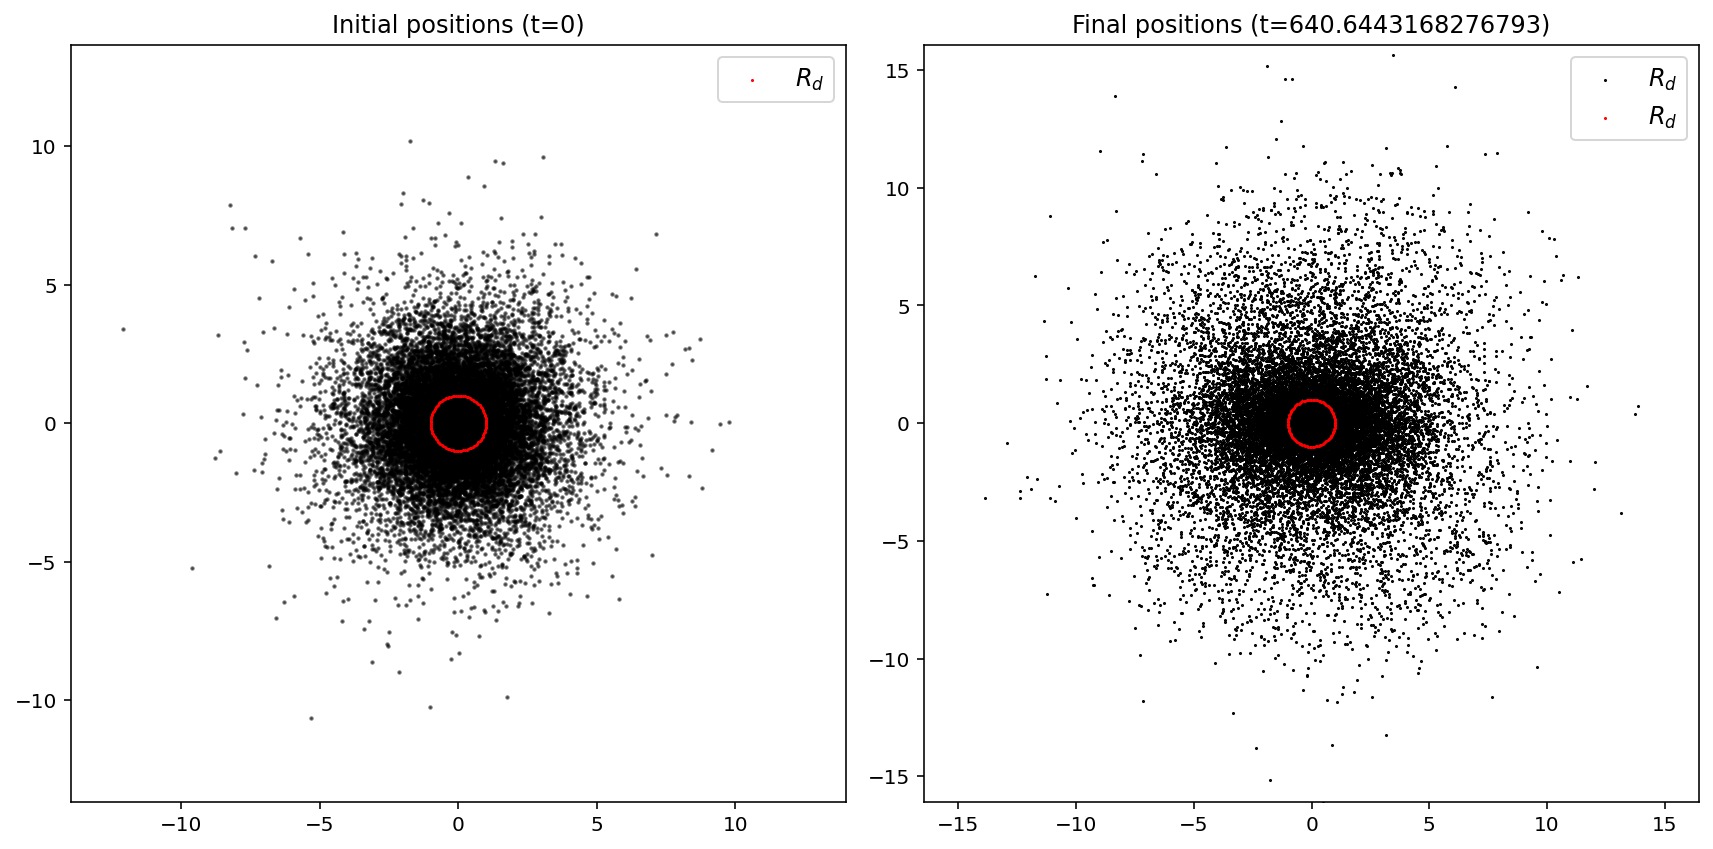

In [33]:
fig, ax = plt.subplots(1,2, tight_layout=True, figsize=(12, 6)) 

ax[0].scatter(x_s[:, 0], y_s[:, 0], c = 'black', alpha=0.5, s=1.5)
ax[0].set_title('Initial positions (t=0)')
ax[0].scatter(x1, x2, color='red',alpha=1, s=0.3, label='$R_d$')
ax[0].axis('equal')
ax[0].legend(fontsize='large')
ax[0].set_xlim(-15 * R_d, 15 * R_d)
ax[0].set_ylim(-15 * R_d, 15 * R_d);


ax[1].scatter(x_s[:, len(t_s)-1], y_s[:, len(t_s)-1], color='black',alpha=1, s=0.3, label='$R_d$')
ax[1].set_title(f'Final positions (t={T_sim})')
ax[1].scatter(x1, x2, color='red',alpha=1, s=0.3, label='$R_d$')
ax[1].axis('equal')
ax[1].legend(fontsize='large')
ax[1].set_xlim(-15 * R_d, 15 * R_d)
ax[1].set_ylim(-15 * R_d, 15 * R_d);

### Evolution frames

In [34]:
len(t_s)

1001

In [35]:
fig = plt.figure(figsize=(15, 15), tight_layout=True)

l=10

index=1
time_array=np.linspace(0, len(t_s)- 1, 9, dtype=int)

t_dyn_units = t_s/T

for i in time_array:
    ax=fig.add_subplot(3,3,index)
    plt.scatter(x_s[:, i], y_s[:, i] , c='black', alpha=0.1, s=1.5)
    
    plt.title(r't=%.1f $T_{orb}$' %t_dyn_units[i])
    #plt.scatter(x1, x2, color='black',alpha=0.9, s=0.1, label='$R_d$')
    plt.axis('equal')
    plt.xlabel('X [kpc]', fontsize=12)
    plt.ylabel('Y [kpc]', fontsize=12)
    plt.xlim(-15 * R_d, 15 * R_d)
    plt.ylim(-15 * R_d, 15 * R_d)
    
    index +=1

#plt.savefig('evolution_framework.pdf')
plt.show()

### Lagrangian radii

The ultimate test to stability.

In [36]:
R_t = np.zeros((N,len(t_s)))

for k in range(0,len(t_s)):
    R_t[:,k] = np.sqrt( x_s[:,k]**2 + y_s[:,k]**2 + z_s[:,k]**2)
    
R_t.shape

(20000, 1001)

In [37]:
#lagrangian radii
#%matplotlib inline

plt.figure(figsize=(12, 10))

lag_80 = []
lag_60 = []
lag_50 = []
lag_10 = []

for i in range(len(t_s)):
    r_sort = R_t[:,i]

    lag_80.append(np.max(r_sort[r_sort < np.quantile(r_sort, 0.8)]))
    lag_60.append(np.max(r_sort[r_sort < np.quantile(r_sort, 0.6)]))
    lag_50.append(np.max(r_sort[r_sort < np.quantile(r_sort, 0.5)]))
    lag_10.append(np.max(r_sort[r_sort < np.quantile(r_sort, 0.1)]))
    
plt.scatter(t_s, lag_80, label="80%",s=4)
plt.scatter(t_s, lag_60, label="60%",s=4)
plt.scatter(t_s, lag_50, label="50%",s=4)
plt.scatter(t_s, lag_10, label="10%",s=4)
plt.axhline(R_d, color='r', linestyle='dashed', label='a: p(R=a)=p$_{tot}(r)/4$')

plt.axhline(lag_80[0], color='black', linestyle='dashed')
plt.axhline(lag_60[0], color='black', linestyle='dashed')
plt.axhline(lag_50[0], color='black', linestyle='dashed')
plt.axhline(lag_10[0], color='black', linestyle='dashed')

plt.xlabel("t [Myr]")
plt.ylabel("r [kpc]")
plt.title("Lagrangian radii study")
plt.legend()
plt.ylim(0,8*R_d);

---

## Animation
Again, run only if necessary.

In [38]:
positions = np.array([x_s.T, y_s.T, z_s.T]).T

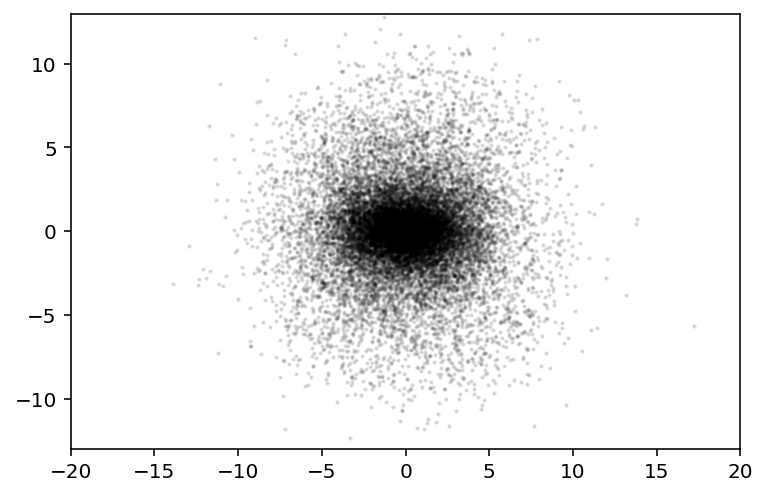

In [39]:
from matplotlib.animation import FuncAnimation

def create_particle_animation_2d_projection(positions, interval=50, save_path=None):
    """
    Create a 2D animation of particle positions using x and y coordinates.

    Parameters:
    - positions: A NumPy array of shape (num_particles, num_frames, 3) representing
                 the 3D positions of particles over time.
    - interval: Time delay between frames in milliseconds.
    - save_path: The path to save the animation as a video file (e.g., 'animation.mp4').

    Returns:
    - ani: The animation object.
    """
    num_particles, num_frames, _ = positions.shape

    fig, ax = plt.subplots()
    ax.axis('equal')
    ax.set_xlim(-20, 20)
    ax.set_ylim(-20, 20)

    scatter = ax.scatter(positions[:, 0, 0], positions[:, 0, 1], s=1.5, color='black', alpha=0.1)
    ax.grid(False)

    def update(frame):
        scatter.set_offsets(positions[:, frame, :2])
        return scatter,

    ani = FuncAnimation(fig, update, frames=num_frames, interval=interval, blit=False)

    if save_path:
        ani.save(save_path, writer='ffmpeg', fps=interval)  # Adjust fps as needed

    plt.show()

    return ani

# Example usage:
# Assuming 'particle_positions' is a NumPy array of shape (num_particles, num_frames, 3)
# You should replace this with your actual data.

create_particle_animation_2d_projection(positions, save_path='esp_disk_2d_projection.gif')

---